# NLPipe - Data Walkthrough
<p>#TODO: Needs description of what this file is</p>

# Initialize environment

In [1]:
import sys
import os

WORKING_DIR = f'{os.getcwd()}' 
MAGRITTE_DIR = f'{WORKING_DIR}/../../magritte'
UTILITIES_DIR = f'{MAGRITTE_DIR}/utilities'

DATA_DIR = f'{WORKING_DIR}/../../data/mimiciii/working'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)


print(f'Environment configured:')
print(f'WORKING_DIR:   {WORKING_DIR}')
print(f'MAGRITTE_DIR:  {MAGRITTE_DIR}')
print(f'UTILITIES_DIR: {UTILITIES_DIR}')
print(f'DATA_DIR:      {DATA_DIR}')


Environment configured:
WORKING_DIR:   /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad
MAGRITTE_DIR:  /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../magritte
UTILITIES_DIR: /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../magritte/utilities
DATA_DIR:      /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../data/mimiciii/working


In [2]:
import pandas as pd
import pickle
import DataUtils

# Load Data

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_pickle(f'{DATA_DIR}/notes_combined.pkl.gz')

from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#ORIG_DF['ICD9_CODE'] = le.fit_transform(ORIG_DF['ICD9_CODE'])

# Changing target column from string to 0,1. Label encoding not yet included in framework
#ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

DataUtils.exploreDataframe(ORIG_DF)

dataframe shape: (58328, 6)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58328 entries, 0 to 58327
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HADM_ID     58328 non-null  float64
 1   TEXT        58328 non-null  object 
 2   ROW_ID      58328 non-null  int64  
 3   SUBJECT_ID  58328 non-null  int64  
 4   SEQ_NUM     58328 non-null  float64
 5   ICD9_CODE   58328 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.1+ MB
None

Null value count by column:


HADM_ID       0
TEXT          0
ROW_ID        0
SUBJECT_ID    0
SEQ_NUM       0
ICD9_CODE     0
dtype: int64



First 5 in dataframe


,HADM_ID,TEXT,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,100001.0,Admission Date: [**2117-9-11**] ...,464704,58526,1.0,25013
1,100003.0,Admission Date: [**2150-4-17**] ...,446055,54610,1.0,53100
2,100006.0,Admission Date: [**2108-4-6**] Discharg...,110907,9895,1.0,49320
3,100007.0,Admission Date: [**2145-3-31**] ...,256425,23018,1.0,56081
4,100009.0,Admission Date: [**2162-5-16**] ...,6306,533,1.0,41401



Last 5 in dataframe


,HADM_ID,TEXT,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
58323,199993.0,Admission Date: [**2161-10-23**] Discha...,232053,20785,1.0,41031
58324,199994.0,Admission Date: [**2188-7-7**] Discharg...,265424,23761,1.0,486
58325,199995.0,Admission Date: [**2137-12-11**] Discha...,216925,19412,1.0,4210
58326,199998.0,Admission Date: [**2119-2-18**] ...,305582,27200,1.0,41401
58327,199999.0,Admission Date: [**2136-4-4**] D...,380657,40370,1.0,48284


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'TEXT'
TARGET_COLUMN = 'ICD9_CODE'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

In [5]:
# Code frequency distribution for data frame with SEPARATE notes
topICD_codes, bottomICD_codesList = DataUtils.showUniqueColVals(ORIG_DF, colName='ICD9_CODE', showRecords=5)

Data type of column [ICD9_CODE] is: object
Total number of rows: 58328
Unique values in column: 2769 [percent unique: 4.7%]
Null values in column: 0
List of unique values:
['25013' '53100' '49320' ... '6141' '6398' '88121']

Top 5 records by frequency for ICD9_CODE
     ICD9_CODE  record_count
833      41401          3497
2731     V3000          3427
2732     V3001          2695
47        0389          2043
822      41071          1747

Bottom 5 records by frequency for ICD9_CODE
     ICD9_CODE  record_count
2768     V7281             1
577      28411             1
598      28749             1
603      28802             1
605      28804             1


In [6]:
# Filter records for top 5 ICD9_CODE
ORIG_DF_filtered = ORIG_DF.loc[ORIG_DF['ICD9_CODE'].isin(topICD_codes)]

# Check results of filtering
topICD_codes, bottomICD_codesList = DataUtils.showUniqueColVals(ORIG_DF_filtered, colName='ICD9_CODE', showRecords=5)

Data type of column [ICD9_CODE] is: object
Total number of rows: 13409
Unique values in column: 5 [percent unique: 0.0%]
Null values in column: 0
List of unique values:
['41401' 'V3000' 'V3001' '0389' '41071']

Top 5 records by frequency for ICD9_CODE
  ICD9_CODE  record_count
2     41401          3497
3     V3000          3427
4     V3001          2695
0      0389          2043
1     41071          1747

Bottom 5 records by frequency for ICD9_CODE
  ICD9_CODE  record_count
1     41071          1747
0      0389          2043
4     V3001          2695
3     V3000          3427
2     41401          3497


# DataPackageParams - Create the data parameters
<p>#TODO: Needs description of what DataPackageParams is</p>

In [7]:
# Retrieve stopwords
with open(f'{DATA_DIR}/custom_stop_words.pkl', 'rb') as f:
   custom_stopwords = pickle.load(f)


print(f'Custom stopwords:')
print(custom_stopwords)


# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                   # Convert to lowercase
                    lower=True,  # lowercase text
    
                    # Contractions
                    fix_contractions = True,

    
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    no_line_breaks=True,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=True,  # replace all URLs with a special token
                    no_emails=True,  # replace all email addresses with a special token
                    no_phone_numbers=True,  # replace all phone numbers with a special token
                    no_numbers=True,  # replace all numbers with a special token
                    no_digits=True,  # replace all digits with a special token
                    no_currency_symbols=True,  # replace all currency symbols with a special token
                    no_punct=True,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="",
                    replace_with_email="",
                    replace_with_phone_number="",
                    replace_with_number="",
                    replace_with_digit="",
                    replace_with_currency_symbol="",
                    lang="en",  # set to 'de' for German special handling

                    # Lemmatize
                    lemmatize = True,
    
                    #Remove small tokens
                    remove_small_tokens = True,
                    min_token_size = 3, # Remove tokens up to and including this value. 
    
                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
                    custom_stopwords= custom_stopwords,    # List of custom stopwords
    
                    # Class Balance
                    balance_dataset = True, # whether the dataset should be balanced or not        
                    balance_type = 'oversample', # options [ overample | undersample ]
                    undersample_size = None, # Can be set to an absolute value. None means undersample to smallest

                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=987,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=400 # Currently only used in TFIDF
                    )

Custom stopwords:
['discharge', 'diagnosis', 'medications', 'medication', 'disposition', 'condition', 'instructions', 'status', 'secondary', 'changes', 'instruction', 'change', 'home', 'name', 'hospital', 'daily', 'hour', 'follow', 'care', 'time', 'day', 'week', 'with', 'disp', 'discharged', 'admitted', 'namepattern', 'none', 'chief', 'complaint', 'physical', 'exam', 'present', 'illness', 'family', 'year', 'history', 'admission', 'social', 'medical', 'allergies', 'date']


# Data Package - Create the data package
<p>#TODO: Needs description of what this file is</p>

In [8]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF_filtered,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)


Target column found. Label encoding target column.


/home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../magritte/utilities/DataPackageSupport.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['uuid'] = dataFrame.apply(lambda _: uuid.uuid4(), axis=1)


DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: TEXT
---> targetColumn: ICD9_CODE
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (13409, 7)
Working Data:
---> working data shape: (13409, 7)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
---> isImportantFeaturesApplied: False
Processing data package with provided parameters
Spawning 15 processes to process text
Processes completed: [ P1 P5 P14 P10 P11 P4 P9 P8 P13 P2 P7 P3 P15 P6 P12 ]

Encoding to TF-IDF with max_features=400
Encoding completed. Feature list:
['abdomen', 'abdominal', 'able', 'abnormality', 'action', 'active', 'acute', 'adequate', 'admitting', 'afternoon', 'airway', 'alert', 'allergy', 'also', 'amount', 'anterior', 'antibiotic', 'aorta', 'aortic', 'appears', 'appropriate',

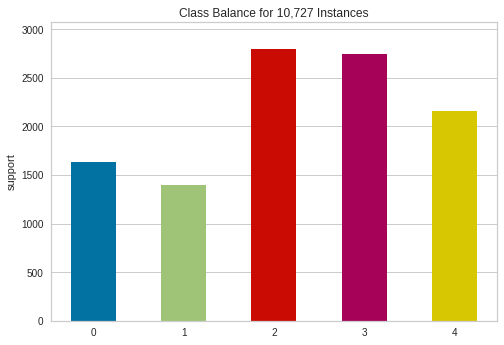

,ICD9_CODE,ttlCol
0,1,1398
1,0,1634
2,4,2156
3,3,2742
4,2,2797


Oversampling data to match max class


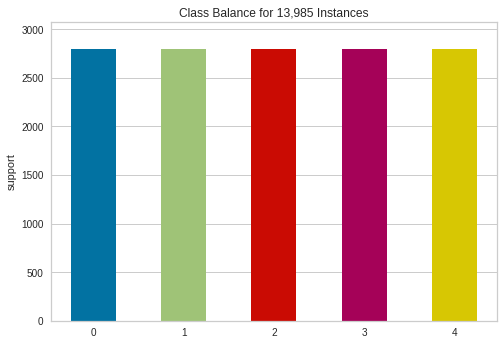

,ICD9_CODE,ttlCol
0,0,2797
1,1,2797
2,2,2797
3,3,2797
4,4,2797



Processing data package has been completed

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: TEXT
---> targetColumn: ICD9_CODE
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True

Original Data:
---> original data shape: (13409, 7)
Working Data:
---> working data shape: (13409, 402)

Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True
---> isImportantFeaturesApplied: False


In [9]:
myDP.processDataPackage(num_cores=15)

# Scratchpad